In [1]:
%matplotlib inline

import numpy as np
from numpy import linalg as LA
from sklearn.cluster import KMeans
import math
from numpy import dot as dot
import networkx as nx
import matplotlib.pylab as plt
import scipy.sparse as sps
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


data = np.loadtxt('cal500',delimiter = ',')
data.shape


(502, 242)

In [67]:
with open('label2.txt') as f:
    label = f.readlines()
print label

['"EmotionAngryAgressive01"\n', '"NOTEmotionAngryAgressive01"\n', '"EmotionArousingAwakening01"\n', '"NOTEmotionArousingAwakening01"\n', '"EmotionBizarreWeird01"\n', '"NOTEmotionBizarreWeird01"\n', '"EmotionCalmingSoothing01"\n', '"NOTEmotionCalmingSoothing01"\n', '"EmotionCarefreeLighthearted01"\n', '"NOTEmotionCarefreeLighthearted01"\n', '"EmotionCheerfulFestive01"\n', '"NOTEmotionCheerfulFestive01"\n', '"EmotionEmotionalPassionate01"\n', '"NOTEmotionEmotionalPassionate01"\n', '"EmotionExcitingThrilling01"\n', '"NOTEmotionExcitingThrilling01"\n', '"EmotionHappy01"\n', '"NOTEmotionHappy01"\n', '"EmotionLaidbackMellow01"\n', '"NOTEmotionLaidbackMellow01"\n', '"EmotionLightPlayful01"\n', '"NOTEmotionLightPlayful01"\n', '"EmotionLovingRomantic01"\n', '"NOTEmotionLovingRomantic01"\n', '"EmotionPleasantComfortable01"\n', '"NOTEmotionPleasantComfortable01"\n', '"EmotionPositiveOptimistic01"\n', '"NOTEmotionPositiveOptimistic01"\n', '"EmotionPowerfulStrong01"\n', '"NOTEmotionPowerfulStrong01

In [3]:
A = data[:,-len(label):]
A.shape
np.rint(A)

(502, 174)

array([[ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.]])

In [4]:
B = np.dot(A.transpose(),A)
B.shape

(174, 174)

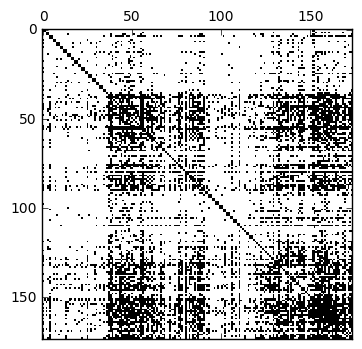

In [5]:
C = (B==0)
ExclMat = C.astype(int) 
for i in range(0,174): 
    for j in range(0,174):
        if i==j:
            ExclMat[i,j]=1
            
plt.spy(ExclMat) 
plt.show()


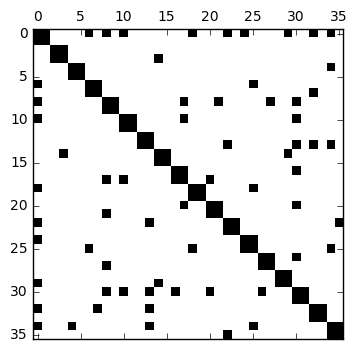

(36, 36)

In [6]:
Emotion = ExclMat[0:36,0:36] #emotion variable 
plt.spy(Emotion)
plt.show()
Emotion.shape

In [7]:
Emotion_data = A[:,0:36]
T =np.zeros((Emotion_data.shape[0],1),dtype=np.int);
for i in range(0,Emotion_data.shape[1]):
    if i%2==1: 
        temp = A[:,i]+A[:,i-1]
        T = np.c_[T,temp]
T=np.delete(T,0,1)
print T.shape
T
X = np.sum(T,0)
X

(502, 18)


array([[ 1.,  0.,  0., ...,  0.,  1.,  0.],
       [ 1.,  0.,  1., ...,  0.,  0.,  0.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ..., 
       [ 1.,  0.,  1., ...,  1.,  1.,  0.],
       [ 1.,  0.,  1., ...,  1.,  1.,  0.],
       [ 1.,  1.,  1., ...,  1.,  1.,  0.]])

array([ 367.,  253.,  318.,  302.,  261.,  287.,  233.,  264.,  270.,
        270.,  279.,  306.,  251.,  238.,  225.,  279.,  310.,  294.])

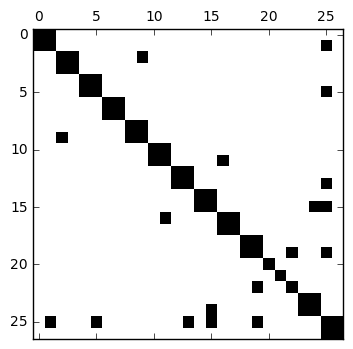

In [8]:
Song = ExclMat[91:118,91:118]
plt.spy(Song)
plt.show()

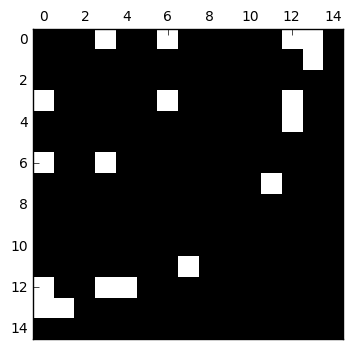

In [9]:
Genre = ExclMat[150:165,150:165] # genre variable 
plt.spy(Genre)
plt.show()

In [10]:
Genre_data =A[:,150:165]
Y = np.sum(Genre_data, axis=1)
print Y  #test if those variable follow multinomial distribution 
np.where(Y==1)
np.where(Y==1)[0].shape

[ 0.  1.  1.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  1.  1.  1.  1.  0.
  1.  1.  1.  1.  1.  0.  1.  0.  0.  1.  0.  0.  0.  1.  0.  1.  1.  0.
  1.  0.  0.  1.  1.  1.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  0.
  0.  0.  1.  0.  0.  0.  1.  1.  0.  0.  0.  1.  0.  1.  0.  1.  1.  0.
  1.  1.  0.  0.  1.  0.  0.  1.  0.  0.  1.  1.  2.  0.  1.  0.  0.  0.
  1.  1.  0.  1.  1.  1.  1.  0.  0.  1.  1.  0.  0.  1.  1.  1.  1.  1.
  1.  0.  0.  0.  1.  1.  1.  1.  0.  0.  1.  0.  1.  0.  1.  1.  0.  1.
  0.  0.  0.  0.  1.  1.  1.  1.  1.  0.  1.  1.  1.  0.  0.  1.  0.  1.
  0.  0.  2.  1.  0.  1.  1.  1.  0.  2.  0.  0.  1.  1.  1.  1.  1.  1.
  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  1.  1.  1.
  0.  0.  1.  1.  1.  1.  1.  1.  2.  1.  1.  0.  0.  1.  0.  1.  1.  0.
  1.  0.  0.  1.  0.  1.  1.  1.  0.  1.  0.  1.  1.  0.  1.  1.  0.  0.
  1.  0.  0.  0.  0.  0.  0.  1.  0.  1.  1.  1.  0.  1.  1.  0.  1.  0.
  1.  0.  1.  0.  0.  1.  0.  1.  1.  0.  0.  0.  0

(array([  1,   2,   5,   7,  13,  14,  15,  16,  18,  19,  20,  21,  22,
         24,  27,  31,  33,  34,  36,  39,  40,  41,  47,  48,  49,  50,
         51,  52,  56,  60,  61,  65,  67,  69,  70,  72,  73,  76,  79,
         82,  83,  86,  90,  91,  93,  94,  95,  96,  99, 100, 103, 104,
        105, 106, 107, 108, 112, 113, 114, 115, 118, 120, 122, 123, 125,
        130, 131, 132, 133, 134, 136, 137, 138, 141, 143, 147, 149, 150,
        151, 156, 157, 158, 159, 160, 161, 166, 167, 168, 169, 170, 171,
        172, 173, 177, 178, 179, 182, 183, 184, 185, 186, 187, 189, 190,
        193, 195, 196, 198, 201, 203, 204, 205, 207, 209, 210, 212, 213,
        216, 223, 225, 226, 227, 229, 230, 232, 234, 236, 239, 241, 242,
        249, 250, 254, 256, 258, 261, 265, 266, 268, 272, 275, 276, 277,
        279, 282, 283, 284, 285, 286, 288, 289, 291, 293, 294, 295, 296,
        297, 298, 301, 302, 305, 306, 310, 315, 317, 318, 321, 324, 327,
        329, 330, 331, 333, 335, 336, 337, 345, 346

(262,)

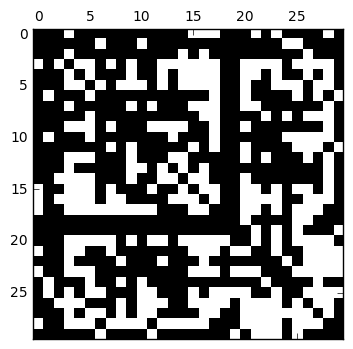

In [11]:
Genre1 = ExclMat[37:67,37:67]
plt.spy(Genre1)
plt.show()

In [12]:
norm = np.sum(ExclMat,axis = 0)
a =  np.divide(np.ones(len(ExclMat)), norm)
b = np.sqrt(a)
D_inv = np.diag(b)
Lap = np.eye(len(ExclMat)) - np.dot(np.dot(D_inv,ExclMat),D_inv)

In [13]:
w,v = LA.eigh(Lap)

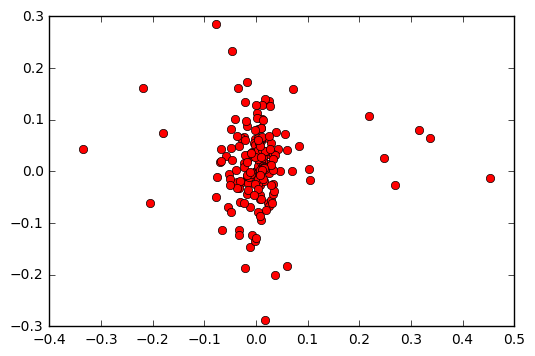

In [14]:
x = v[0:2]

plt.plot(v[1],v[2],'ro')
plt.show()

In [15]:
X = np.transpose([v[1],v[2]])
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
classes = kmeans.labels_
print classes

[0 1 0 0 0 0 0 1 0 0 2 1 0 1 2 1 2 1 2 2 0 1 1 2 0 1 0 0 0 0 1 1 1 0 1 1 1
 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 1
 1 1 1 0 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0
 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0
 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1]


In [16]:
ind0 = np.where(classes==0)[0]
print ind0 
print len(ind0)
ind1 = np.where(classes ==1)[0]
print ind1
print len(ind1)
ind2 = np.where(classes ==2)[0]
print ind2
print len(ind2)

[  0   2   3   4   5   6   8   9  12  20  24  26  27  28  29  33  37  38
  40  42  44  46  47  48  50  53  54  55  60  61  63  64  65  69  72  77
  78  81  82  83  84  89  90  92  93  96  98 100 101 103 105 107 110 112
 114 115 116 119 121 122 124 125 127 128 132 133 134 138 140 141 144 145
 146 147 149 151 152 153 156 157 159 160 162 163 164 168 169 172]
88
[  1   7  11  13  15  17  21  22  25  30  31  32  34  35  36  39  41  43
  45  49  51  52  56  57  58  59  62  66  67  68  70  71  73  74  75  76
  79  80  85  86  87  88  91  94  95  97  99 102 104 106 108 109 111 113
 117 118 120 123 126 129 130 131 135 136 137 139 142 143 148 150 154 155
 158 161 165 166 167 170 171 173]
80
[10 14 16 18 19 23]
6


[[1 0 0 ..., 1 1 1]
 [0 1 1 ..., 1 0 0]
 [0 1 1 ..., 0 0 0]
 ..., 
 [1 1 0 ..., 1 1 0]
 [1 0 0 ..., 1 1 0]
 [1 0 0 ..., 0 0 1]]
(88, 88)


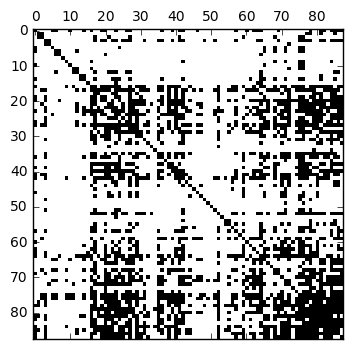

In [17]:
y = ExclMat[np.ix_(ind0,ind0)]
print y
print y.shape
plt.spy(y)
plt.show()

[[1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 1 0 0]
 [0 0 0 ..., 0 1 0]
 [0 0 0 ..., 0 0 1]]
(80, 80)


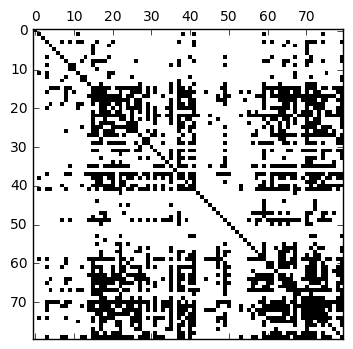

In [18]:
y = ExclMat[np.ix_(ind1,ind1)]
print y
print y.shape
plt.spy(y)
plt.show()

[[1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 1 0]
 [0 0 0 1 1 0]
 [0 0 0 0 0 1]]
(6, 6)


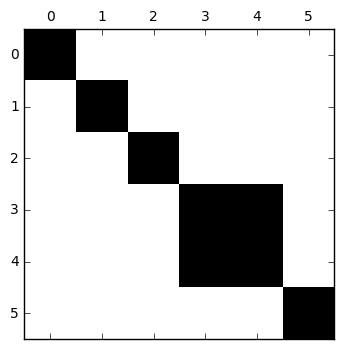

In [19]:
y = ExclMat[np.ix_(ind2,ind2)]
print y
print y.shape
plt.spy(y)
plt.show()

In [20]:
G = nx.from_numpy_matrix(ExclMat)
X = nx.find_cliques(G)
Y = list(X) 


In [21]:
max_clique = 0 
max_index =0
for y in Y: 
    if y > max_clique:
        max_clique = y 
        max_index =y.index
print max_clique; 


[173, 166, 39, 151, 172, 155, 146, 137, 162, 164, 165, 47]


[[   0.  367.    0. ...,    0.   58.   54.]
 [ 367.    0.    0. ...,    0.    0.    0.]
 [   0.    0.    0. ...,    0.    0.    0.]
 ..., 
 [   0.    0.    0. ...,    0.    0.    0.]
 [  58.    0.    0. ...,    0.    0.   16.]
 [  54.    0.    0. ...,    0.   16.    0.]]


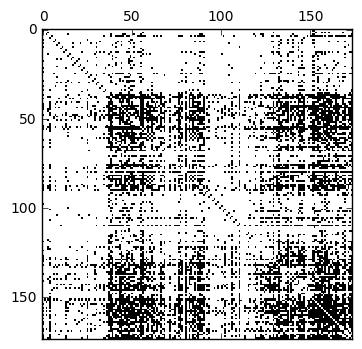

453.0

109 110 453.0
"SongRecorded01"
"NOTSongRecorded01"



In [22]:
acc = np.zeros(ExclMat.shape); 
for i in range(0,ExclMat.shape[0]):
    for j in range(0,ExclMat.shape[1]):
        if ExclMat[i,j] ==1 and i!=j:
            temp = A[:,i] + A[:,j]
            acc[i,j] = sum(temp) 
print acc
plt.spy(acc)
plt.show()
i,j = np.unravel_index(acc.argmax(), acc.shape)
acc[i,j]
print i,j, acc[i,j]
print label[i],label[j]

In [23]:
T =acc 

for k in range(100):
    i,j = np.unravel_index(T.argmax(), T.shape)
    print i,j, T[i,j]
    print label[i],label[j]
    T[i,j]=0
    T[j,i]=0;


109 110 453.0
"SongRecorded01"
"NOTSongRecorded01"

0 1 367.0
"EmotionAngryAgressive01"
"NOTEmotionAngryAgressive01"

48 112 333.0
"GenreGospel01"
"SongTextureElectric01"

1 151 329.0
"NOTEmotionAngryAgressive01"
"GenreBestMetalHardRock01"

1 152 328.0
"NOTEmotionAngryAgressive01"
"GenreBestPunk01"

99 100 324.0
"SongHighEnergy01"
"NOTSongHighEnergy01"

4 5 318.0
"EmotionBizarreWeird01"
"NOTEmotionBizarreWeird01"

72 157 315.0
"InstrumentDrumSet01"
"GenreBestElectronica01"

116 117 314.0
"SongVeryDanceable01"
"NOTSongVeryDanceable01"

32 33 310.0
"EmotionTenderSoft01"
"NOTEmotionTenderSoft01"

5 146 306.0
"NOTEmotionBizarreWeird01"
"VocalsSpoken01"

22 23 306.0
"EmotionLovingRomantic01"
"NOTEmotionLovingRomantic01"

6 7 302.0
"EmotionCalmingSoothing01"
"NOTEmotionCalmingSoothing01"

105 106 300.0
"SongQuality01"
"NOTSongQuality01"

8 21 296.0
"EmotionCarefreeLighthearted01"
"NOTEmotionLightPlayful01"

22 35 295.0
"EmotionLovingRomantic01"
"NOTEmotionTouchingLoving01"

34 35 294.0
"Emot

In [24]:
dist = np.dot(A.transpose(),A)
dist.shape

(174, 174)

In [25]:
print dist

[[  48.    0.   28. ...,    1.    0.    0.]
 [   0.  319.   70. ...,   12.    7.    5.]
 [  28.   70.  154. ...,    4.    3.    4.]
 ..., 
 [   1.   12.    4. ...,   14.    2.    1.]
 [   0.    7.    3. ...,    2.   10.    0.]
 [   0.    5.    4. ...,    1.    0.    6.]]


In [26]:
for i in range(dist.shape[0]):
    dist[i,i]=0 
print dist

[[  0.   0.  28. ...,   1.   0.   0.]
 [  0.   0.  70. ...,  12.   7.   5.]
 [ 28.  70.   0. ...,   4.   3.   4.]
 ..., 
 [  1.  12.   4. ...,   0.   2.   1.]
 [  0.   7.   3. ...,   2.   0.   0.]
 [  0.   5.   4. ...,   1.   0.   0.]]


In [27]:
norm = np.sum(dist,axis = 0)
a =  np.divide(np.ones(len(dist)), norm)
b = np.sqrt(a)
D_inv = np.diag(b)
Lap = np.dot(np.dot(D_inv,dist),D_inv) 
print Lap

[[ 0.          0.          0.0112989  ...,  0.00131938  0.          0.        ]
 [ 0.          0.          0.01212994 ...,  0.00679883  0.0046564
   0.00440754]
 [ 0.0112989   0.01212994  0.         ...,  0.00308161  0.00271355
   0.00479458]
 ..., 
 [ 0.00131938  0.00679883  0.00308161 ...,  0.          0.00591478
   0.00391907]
 [ 0.          0.0046564   0.00271355 ...,  0.00591478  0.          0.        ]
 [ 0.          0.00440754  0.00479458 ...,  0.00391907  0.          0.        ]]


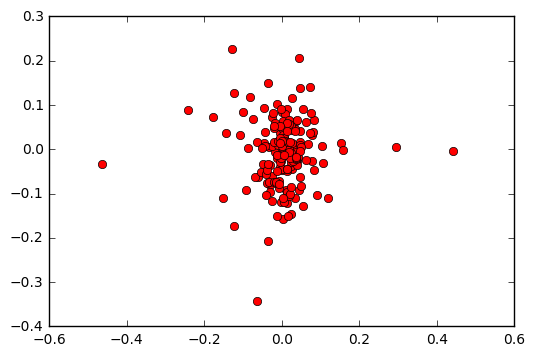

In [28]:
w,v = LA.eigh(Lap)

x = v[0:2]

plt.plot(v[1],v[2],'ro')
plt.show()

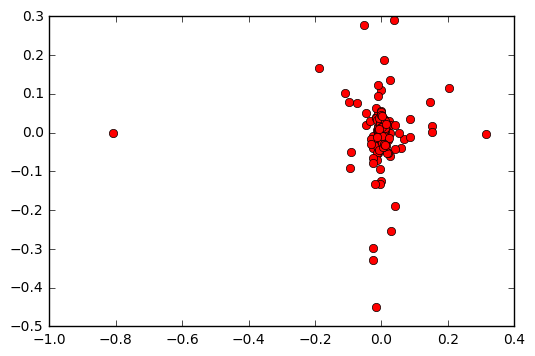

In [29]:
Lap = dist 
w,v = LA.eigh(Lap)

x = v[0:2]
plt.plot(v[1],v[2],'ro')
plt.show()

[[ 0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  2.  0.  0.]
 [ 0.  0.  0.  3.  0.]
 [ 0.  0.  0.  0.  4.]]


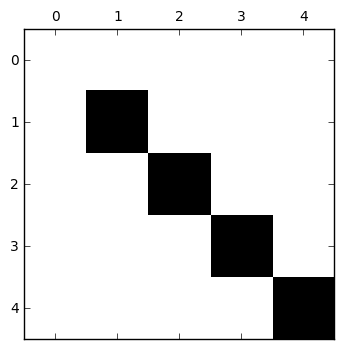

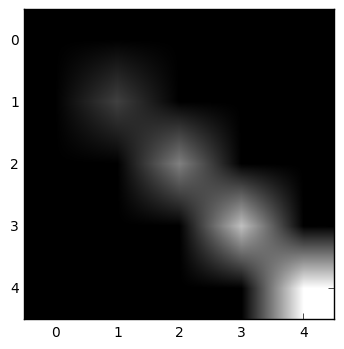

In [30]:
test = np.zeros((5,5))
for i in range(5):
    test[i,i] = i 
print test
plt.spy(test)
plt.show()

imgshow = plt.imshow(test,cmap = 'gray')

In [31]:
bal_ratio = np.zeros((acc.shape))
acc_1 = np.zeros((acc.shape))

for i in range(acc.shape[0]):
    for j in range(acc.shape[1]):
        if acc[i,j] != 0:
            bal_ratio[i,j] = round(4*float(sum(A[:,i])*sum(A[:,j]))/ 502/502,2)
            acc_1[i,j] = acc[i,j]*bal_ratio[i,j]
print acc_1
print bal_ratio



[[ 0.    0.    0.   ...,  0.    0.58  0.  ]
 [ 0.    0.    0.   ...,  0.    0.    0.  ]
 [ 0.    0.    0.   ...,  0.    0.    0.  ]
 ..., 
 [ 0.    0.    0.   ...,  0.    0.    0.  ]
 [ 0.58  0.    0.   ...,  0.    0.    0.  ]
 [ 0.    0.    0.   ...,  0.    0.    0.  ]]
[[ 0.    0.    0.   ...,  0.    0.01  0.  ]
 [ 0.    0.    0.   ...,  0.    0.    0.  ]
 [ 0.    0.    0.   ...,  0.    0.    0.  ]
 ..., 
 [ 0.    0.    0.   ...,  0.    0.    0.  ]
 [ 0.01  0.    0.   ...,  0.    0.    0.  ]
 [ 0.    0.    0.   ...,  0.    0.    0.  ]]


In [32]:
T =bal_ratio

for k in range(100):
    i,j = np.unravel_index(T.argmax(), T.shape)
    print i,j, T[i,j]
    print label[i],label[j]
    T[i,j]=0
    T[j,i]=0;

13 32 0.12
"NOTEmotionEmotionalPassionate01"
"EmotionTenderSoft01"

18 25 0.12
"EmotionLaidbackMellow01"
"NOTEmotionPleasantComfortable01"

13 138 0.11
"NOTEmotionEmotionalPassionate01"
"VocalsEmotional01"

20 104 0.11
"EmotionLightPlayful01"
"NOTSongPositiveFeelings01"

26 30 0.11
"EmotionPositiveOptimistic01"
"EmotionSad01"

98 118 0.11
"NOTSongHeavyBeat01"
"UsageAtaparty01"

3 118 0.1
"NOTEmotionArousingAwakening01"
"UsageAtaparty01"

8 30 0.1
"EmotionCarefreeLighthearted01"
"EmotionSad01"

10 30 0.1
"EmotionCheerfulFestive01"
"EmotionSad01"

13 22 0.09
"NOTEmotionEmotionalPassionate01"
"EmotionLovingRomantic01"

13 34 0.09
"NOTEmotionEmotionalPassionate01"
"EmotionTouchingLoving01"

92 116 0.09
"NOTSongCatchyMemorable01"
"SongVeryDanceable01"

0 8 0.08
"EmotionAngryAgressive01"
"EmotionCarefreeLighthearted01"

0 10 0.08
"EmotionAngryAgressive01"
"EmotionCheerfulFestive01"

0 18 0.08
"EmotionAngryAgressive01"
"EmotionLaidbackMellow01"

0 32 0.08
"EmotionAngryAgressive01"
"EmotionTen

In [33]:
Genre_index = range(150,165)

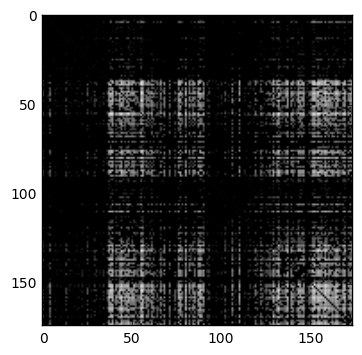

In [34]:
nbhd = np.zeros(ExclMat.shape)

for i in range(ExclMat.shape[0]):
    for j in range(ExclMat.shape[1]):
        if ExclMat[i,j] != 0:
            if i!=j:
                nbhd[i,j] = np.dot(ExclMat[:,i],ExclMat[:,j])
plt.imshow(nbhd,cmap = 'gray')

In [35]:
acc_2 = np.zeros(ExclMat.shape)

for i in range(ExclMat.shape[0]):
    for j in range(ExclMat.shape[1]):
        if ExclMat[i,j] != 0 and i!=j:
            nbhd_ij = np.where(ExclMat[:,i]+ExclMat[:,j]==2)
            for k in range(len(nbhd_ij[0])):
                acc_2[i,j] += sum(A[:,nbhd_ij[0][k]])
print acc_2

[[    0.   367.     0. ...,     0.   305.   641.]
 [  367.     0.     0. ...,     0.     0.     0.]
 [    0.     0.     0. ...,     0.     0.     0.]
 ..., 
 [    0.     0.     0. ...,     0.     0.     0.]
 [  305.     0.     0. ...,     0.     0.  1711.]
 [  641.     0.     0. ...,     0.  1711.     0.]]


In [36]:
import pandas as pd

temp1 = acc_2[Genre_index,:]
temp2 = temp1[:,Genre_index]
df = pd.DataFrame(temp2, columns = label[150:165],index = label[150:165])
df

,"""GenreBestClassicRock01""","""GenreBestMetalHardRock01""","""GenreBestPunk01""","""GenreBestSoftRock01""","""GenreBestSoul01""","""GenreBestBlues01""","""GenreBestCountry01""","""GenreBestElectronica01""","""GenreBestFolk01""","""GenreBestHipHopRap01""","""GenreBestJazz01""","""GenreBestPop01""","""GenreBestRandB01""","""GenreBestRock01""","""GenreBestWorld01"""
"""GenreBestClassicRock01""\n",0.0,707.0,748.0,0.0,717.0,714.0,0.0,432.0,742.0,492.0,694.0,473.0,0.0,0.0,664.0
"""GenreBestMetalHardRock01""\n",707.0,0.0,3527.0,925.0,1551.0,1462.0,1349.0,1015.0,1814.0,1536.0,1195.0,799.0,911.0,0.0,1402.0
"""GenreBestPunk01""\n",748.0,3527.0,0.0,1090.0,1859.0,1801.0,1413.0,1085.0,1878.0,1792.0,1488.0,841.0,1043.0,1206.0,1483.0
"""GenreBestSoftRock01""\n",0.0,925.0,1090.0,0.0,1210.0,983.0,0.0,645.0,1531.0,812.0,1234.0,710.0,0.0,698.0,927.0
"""GenreBestSoul01""\n",717.0,1551.0,1859.0,1210.0,0.0,2136.0,1545.0,1053.0,1704.0,1789.0,2335.0,975.0,0.0,805.0,1772.0
"""GenreBestBlues01""\n",714.0,1462.0,1801.0,983.0,2136.0,0.0,1671.0,1091.0,1798.0,1756.0,1876.0,879.0,1294.0,884.0,1517.0
"""GenreBestCountry01""\n",0.0,1349.0,1413.0,0.0,1545.0,1671.0,0.0,847.0,2672.0,1067.0,1917.0,711.0,1230.0,767.0,1431.0
"""GenreBestElectronica01""\n",432.0,1015.0,1085.0,645.0,1053.0,1091.0,847.0,0.0,1097.0,1208.0,1276.0,0.0,648.0,638.0,1527.0
"""GenreBestFolk01""\n",742.0,1814.0,1878.0,1531.0,1704.0,1798.0,2672.0,1097.0,0.0,1321.0,2041.0,872.0,1220.0,908.0,1901.0
"""GenreBestHipHopRap01""\n",492.0,1536.0,1792.0,812.0,1789.0,1756.0,1067.0,1208.0,1321.0,0.0,1416.0,937.0,1046.0,854.0,1555.0


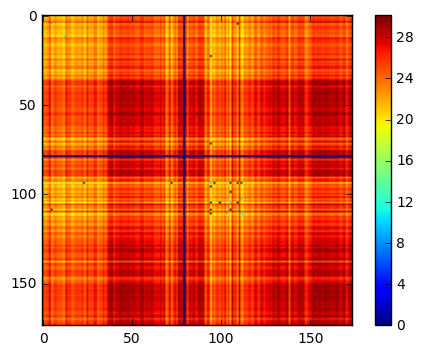

In [66]:
plt.imshow(np.log(np.dot(np.dot(acc_2,acc_2),acc_2)+np.dot(acc_2,acc_2)+acc_2+1),cmap = 'jet')
cb = plt.colorbar()
plt.show()


In [56]:
X = np.log(acc_2+1) 

norm = np.sum(X,axis = 0)
print norm
a =  np.divide(np.ones(len(X)), norm)
b = np.sqrt(a)
D_inv = np.diag(b)
Lap = np.eye(len(X)) - np.dot(np.dot(D_inv,X),D_inv)
print Lap


[ 300.91022417   17.56008315   43.01842353   85.5134608   363.52918021
   11.49203885   58.73781676   82.29085998   89.49987555   26.38786002
   63.00142654   21.52776157   15.71497848  218.3441458    86.12633752
   72.36594725   47.86654702   37.19452152   68.98018102   60.06637863
   78.5775452    38.25099706  128.56618466   27.93985852   32.35167736
  243.07505615   53.5509827    73.82466142   33.02127927  180.22712152
  150.54987661   16.57933095  103.10703963   33.10829426  172.50900727
   33.85029115  149.6451753   555.41008012  647.95348449  630.73605564
  166.16237562  497.3519567   335.6936535   567.96159752  651.6121336
  461.40189173  475.11646576  514.69042361  629.79928824  424.57387468
  497.63939953  502.0269919   324.04319316  293.51226012  314.59818384
  762.7288796   694.79498401  257.45586052  359.62536642  369.62011146
  316.90074065  529.10059303  317.1737193   175.22616879  250.10730624
  153.41774533  472.54814037  167.69389987  386.9286387    20.45294341
   26.4

In [58]:
w,v = LA.eigh(Lap)
print Lap
x = v[0:2]
print w


[[ 1.         -0.08127647  0.         ...,  0.         -0.01479743
  -0.01468271]
 [-0.08127647  1.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          1.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  1.          0.          0.        ]
 [-0.01479743  0.          0.         ...,  0.          1.         -0.01315556]
 [-0.01468271  0.          0.         ...,  0.         -0.01315556  1.        ]]
[  1.  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  na